<a href="https://colab.research.google.com/github/BelajarMachineLearning/Pengenalan-Deep-Learning/blob/main/5_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

17473536/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the nda

Adding Weight Regularization

In [ ]:
from keras import models
from keras import layers
import matplotlib.pyplot as plt


original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))


Epoch 1/20
49/49 [==============================] - 19s 63ms/step - loss: 0.5327 - acc: 0.7558 - val_loss: 0.3262 - val_acc: 0.8790
Epoch 2/20
49/49 [==============================] - 2s 41ms/step - loss: 0.2669 - acc: 0.9047 - val_loss: 0.3241 - val_acc: 0.8669
Epoch 3/20
49/49 [==============================] - 2s 41ms/step - loss: 0.1973 - acc: 0.9293 - val_loss: 0.2842 - val_acc: 0.8871
Epoch 4/20
49/49 [==============================] - 2s 40ms/step - loss: 0.1608 - acc: 0.9440 - val_loss: 0.2945 - val_acc: 0.8829
Epoch 5/20
49/49 [==============================] - 2s 40ms/step - loss: 0.1345 - acc: 0.9555 - val_loss: 0.3337 - val_acc: 0.8744
Epoch 6/20
49/49 [==============================] - 2s 41ms/step - loss: 0.1146 - acc: 0.9621 - val_loss: 0.3363 - val_acc: 0.8746
Epoch 7/20
49/49 [==============================] - 2s 41ms/step - loss: 0.1029 - acc: 0.9663 - val_loss: 0.3631 - val_acc: 0.8705
Epoch 8/20
49/49 [==============================] - 2s 41ms/step - loss: 0.0875 - 

In [ ]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']

In [ ]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [ ]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 4s 60ms/step - loss: 0.5976 - acc: 0.7355 - val_loss: 0.3856 - val_acc: 0.8728
Epoch 2/20
49/49 [==============================] - 2s 41ms/step - loss: 0.3312 - acc: 0.9007 - val_loss: 0.3618 - val_acc: 0.8720
Epoch 3/20
49/49 [==============================] - 2s 41ms/step - loss: 0.2686 - acc: 0.9227 - val_loss: 0.3345 - val_acc: 0.8872
Epoch 4/20
49/49 [==============================] - 2s 42ms/step - loss: 0.2497 - acc: 0.9282 - val_loss: 0.3786 - val_acc: 0.8665
Epoch 5/20
49/49 [==============================] - 2s 41ms/step - loss: 0.2314 - acc: 0.9377 - val_loss: 0.3445 - val_acc: 0.8836
Epoch 6/20
49/49 [==============================] - 2s 41ms/step - loss: 0.2220 - acc: 0.9430 - val_loss: 0.3650 - val_acc: 0.8768
Epoch 7/20
49/49 [==============================] - 2s 42ms/step - loss: 0.2150 - acc: 0.9455 - val_loss: 0.3711 - val_acc: 0.8765
Epoch 8/20
49/49 [==============================] - 2s 41ms/step - loss: 0.2066 - a

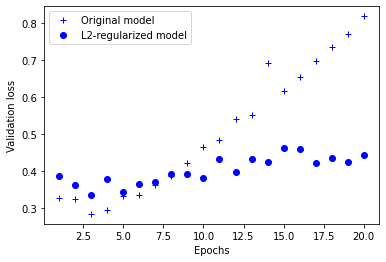

In [ ]:

l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

Drpout

In [ ]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

In [ ]:
dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 4s 60ms/step - loss: 0.6334 - acc: 0.6212 - val_loss: 0.4327 - val_acc: 0.8700
Epoch 2/20
49/49 [==============================] - 2s 40ms/step - loss: 0.4491 - acc: 0.8036 - val_loss: 0.3311 - val_acc: 0.8804
Epoch 3/20
49/49 [==============================] - 2s 41ms/step - loss: 0.3528 - acc: 0.8631 - val_loss: 0.2899 - val_acc: 0.8893
Epoch 4/20
49/49 [==============================] - 2s 41ms/step - loss: 0.3003 - acc: 0.8914 - val_loss: 0.2836 - val_acc: 0.8859
Epoch 5/20
49/49 [==============================] - 2s 40ms/step - loss: 0.2573 - acc: 0.9097 - val_loss: 0.2771 - val_acc: 0.8918
Epoch 6/20
49/49 [==============================] - 2s 41ms/step - loss: 0.2259 - acc: 0.9236 - val_loss: 0.2883 - val_acc: 0.8909
Epoch 7/20
49/49 [==============================] - 2s 41ms/step - loss: 0.2023 - acc: 0.9318 - val_loss: 0.3045 - val_acc: 0.8884
Epoch 8/20
49/49 [==============================] - 2s 41ms/step - loss: 0.1852 - a

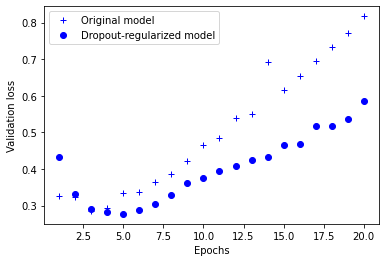

In [ ]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()